In [1]:
import numpy as np              # модуль для матричных вычислений
import matplotlib.pyplot as plt # модуль для построения графиков
from matplotlib import cm       # модуль цветовых карт
import subprocess               # модуль для запуска подпроцессов
import re                       # модуль для работы с регулярными выражениями

In [2]:
!g++ force.cpp -o force

Проведём игру два на два для заданного соотношения суммарных сил $c$.
В ней мы будем выставлять команду с силами $a, 1-a$ против команды с силами $c b, c (1-b)$.
Для каждой точки высчитываем среднюю ожидаемую суммарную силу к концу боя.

In [3]:
c = 1.2 # отношение суммарных сил комманд

# количество точек равномерного разбиения (0, 1)
size_first = 30
size_second = 30

# матрица искомых средних суммарных сил к концу сражения
e_force_first = np.zeros((size_first, size_second))
e_force_second = np.zeros((size_first, size_second))

# разбиение интервала (0, 1)
A = np.linspace(1 / (2*size_first), 1 - 1 / (2*size_first), size_first)
B = np.linspace(1 / (2*size_second), 1 - 1 / (2*size_second), size_second)

for i, a in enumerate(A): # получаем точки массива и нумеруем их
    for j, b in enumerate(B):
        with open("input.txt", "w") as force_input: # открываем файл на запись, записываем что нужно для программы force
            force_input.write("2\n")
            force_input.write(f"{a} {1-a}\n")
            force_input.write("2\n")
            force_input.write(f"{c*b} {c*(1-b)}\n")
        
        # запускаем процесс выполнения программы
        out = subprocess.check_output(f"./force", shell=True).decode()
        
        # регулярными выражениями выделяем нужные числа и записываем их в матрицы
        res = re.findall(r"the first comand :\ +(\d+\.\d+)", out)
        assert len(res) == 1, f"Wrong file output. res = {res}"
        e_force_first[i, j] = float(res[0])
        
        res = re.findall(r"the second comand :\ +(\d+\.\d+)", out)
        assert len(res) == 1, f"Wrong file output. res = {res}"
        e_force_second[i, j] = float(res[0])

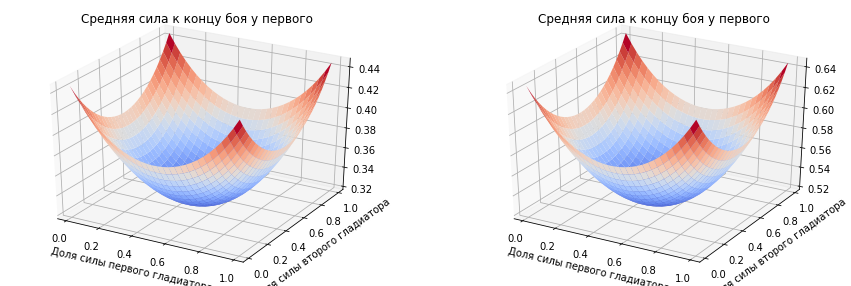

In [4]:
fig = plt.figure(figsize=(15, 5))
# преобразование для построения 3D графиков
X, Y = np.meshgrid(A, B)

# строим первый подграфик
ax = plt.subplot("121", projection='3d', title="Средняя сила к концу боя у первого",
                xlabel="Доля силы первого гладиатора", ylabel="Доля силы второго гладиатора")
surf_first = ax.plot_surface(X, Y, e_force_first, cmap=cm.coolwarm)

# строим второй подграфик
ax = plt.subplot("122", projection='3d', title="Средняя сила к концу боя у первого",
                 xlabel="Доля силы первого гладиатора", ylabel="Доля силы второго гладиатора")
surf_second = ax.plot_surface(X, Y, e_force_second, cmap=cm.coolwarm)
plt.show()